# median filter

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline



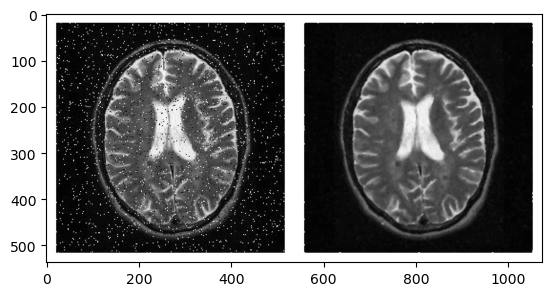

In [2]:
img = cv2.imread('salt_nd_pepper.jpg')
median = cv2.medianBlur(img, 5)
compare = np.concatenate((img, median), axis=1) #side by side comparison

plt.imshow(compare )

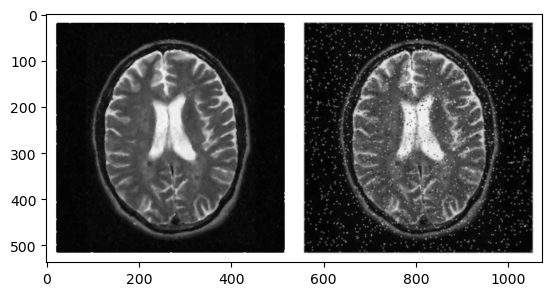

In [9]:
gauss = cv2.GaussianBlur(img, (5,5), 0)

images = np.concatenate((median, gauss), axis=1)

plt.imshow(images)

# Prewitt operator

In [5]:
#define kernal convolution function
# with image X and filter F
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

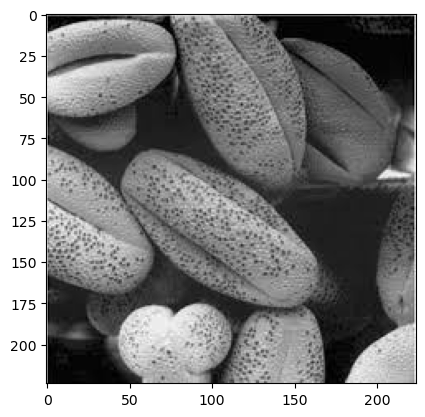

In [6]:
#read the gray scale image
image = cv2.imread('images.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [8]:
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
#normalizing the vectors
pre_x = convolve(image, Hx) / 6.0
pre_y = convolve(image, Hy) / 6.0

In [9]:
#calculate the gradient magnitude of vectors
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
# mapping values from 0 to 255
pre_out = (pre_out / np.max(pre_out)) * 255

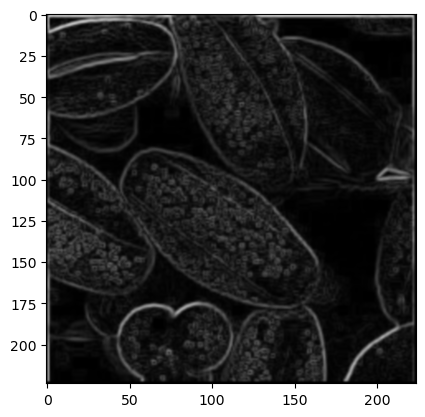

In [10]:
#output images
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Sobel Operator

In [11]:
#define horizontal and Vertical sobel kernels
Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

In [13]:
#normalizing the vectors
sob_x = convolve(image, Gx) / 8.0
sob_y = convolve(image, Gy) / 8.0

In [14]:
#calculate the gradient magnitude of vectors
sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
# mapping values from 0 to 255
sob_out = (sob_out / np.max(sob_out)) * 255

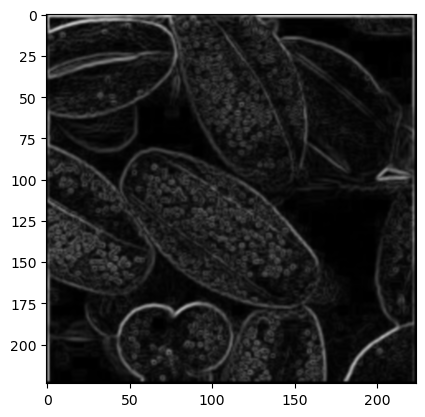

In [15]:
plt.imshow(sob_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Laplacian Operator

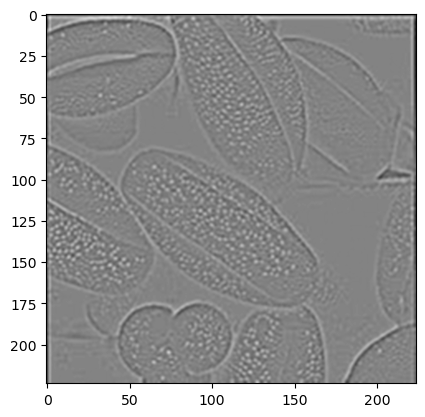

In [16]:
#apply gaussian blur
blur_img = cv2.GaussianBlur(image, (3, 3), 0)
# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray',interpolation = 'bicubic')
plt.show()